# 03 - Baseline Model

Since we have a multiclass classification we can use Logistic regression to have a start point.

In this notebook we are going to build a logistic regression model with our dataset (using only a grayscale channel) :

### Steps: 
 - Importing/accessing the data;
 - Separating the Train and Test Data;
 - (Upload and Download the model in case you just want to evaluate);
 - Fit the model (in this case, train the logistic regression);
 - Evaluate the model;
    - Accuracy, Precision, Recall, f1
    - Confusion Matrix 
    - Roc/AuC
 - Using the model to predict the specific images

## Importing/accessing the data

First, importing the libs and treating the data:

In [101]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dataset_directory = '../datasets/dataset_normal/'

# Load and preprocess images
def load_images(directory):
    images = []
    labels = []
    for label, folder in enumerate(os.listdir(directory)):
        for filename in os.listdir(os.path.join(directory, folder)):
            img = cv2.imread(os.path.join(directory, folder, filename))
            img = cv2.resize(img, (100, 100))  # Resize image
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            images.append(img.flatten())  # Flatten image
            labels.append(label)
    return np.array(images), np.array(labels)

# Feature extraction
images, labels = load_images(dataset_directory)

# Feature scaling (optional but recommended)
images = images / 255.0  # Scale pixel values to range [0, 1]


In [102]:
# Sanity Check
images.shape
# labels

(17092, 10000)

## Separating the Train and Test Data

Spliting data into training and testing sets

In [103]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size=0.8, test_size=0.2, stratify=labels, random_state=42)


In [104]:
# Seeing the results
print(X_train.shape)
print(y_train.shape)
# print(y_train)
print(X_test.shape)
print(y_train.shape)

(13673, 10000)
(13673,)
(3419, 10000)
(13673,)


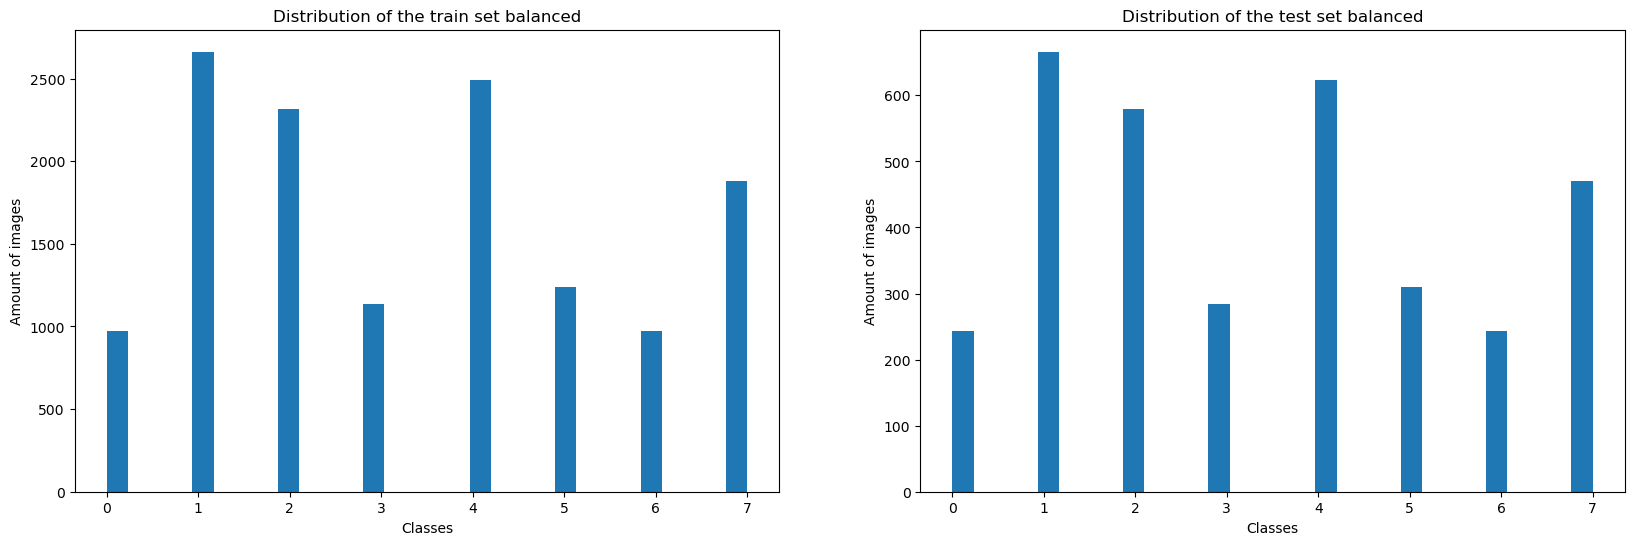

In [105]:
import matplotlib.pyplot as plt

# Plotting the y_ values to see how is the distribution
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30)
plt.title('Distribution of the train set balanced')
plt.xlabel('Classes')
plt.ylabel('Amount of images')

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30)
plt.title('Distribution of the test set balanced')
plt.xlabel('Classes')
plt.ylabel('Amount of images')

plt.show()


In [106]:
from sklearn.utils import resample

# Calculate the size of the smallest class
min_class_size = min(np.bincount(y_train))

# Undersampling majority classes to match the size of the minority class
X_train_balanced = []
y_train_balanced = []
for i in range(8):  # Assuming we have 8 classes
    X_class_i = X_train[y_train == i]
    y_class_i = y_train[y_train == i]
    X_class_i_resampled, y_class_i_resampled = resample(X_class_i, y_class_i, n_samples=min_class_size, random_state=42)
    X_train_balanced.append(X_class_i_resampled)
    y_train_balanced.append(y_class_i_resampled)

X_train_balanced = np.concatenate(X_train_balanced)
y_train_balanced = np.concatenate(y_train_balanced)

#---
# Doing the same for the test set

# Calculate the size of the smallest class
min_class_size_test = min(np.bincount(y_test))

X_test_balanced = []
y_test_balanced = []
for i in range(8):  # Assuming we have 8 classes
    X_class_i = X_test[y_test == i]
    y_class_i = y_test[y_test == i]
    X_class_i_resampled, y_class_i_resampled = resample(X_class_i, y_class_i, n_samples=min_class_size_test, random_state=42)
    X_test_balanced.append(X_class_i_resampled)
    y_test_balanced.append(y_class_i_resampled)

X_test_balanced = np.concatenate(X_test_balanced)
y_test_balanced = np.concatenate(y_test_balanced)

# #-------------------------
# #-------------------------
# # Oversampling minority classes to match the size of the majority class
# # You can use techniques like SMOTE for better synthetic sampling
# # Here, I'm just duplicating existing samples
# X_train_balanced_oversampled = []
# y_train_balanced_oversampled = []
# for i in range(8):  # Assuming you have 8 classes
#     X_class_i = X_train[y_train == i]
#     y_class_i = y_train[y_train == i]
#     X_class_i_oversampled, y_class_i_oversampled = resample(X_class_i, y_class_i, n_samples=len(X_train_balanced), random_state=42)
#     X_train_balanced_oversampled.append(X_class_i_oversampled)
#     y_train_balanced_oversampled.append(y_class_i_oversampled)

# X_train_balanced_oversampled = np.concatenate(X_train_balanced_oversampled)
# y_train_balanced_oversampled = np.concatenate(y_train_balanced_oversampled)


In [107]:
# Seeing how is the shape of the data
print(X_train_balanced.shape)
print(y_train_balanced.shape)
# print(y_train)
print(X_test_balanced.shape)
print(y_test_balanced.shape)

(7768, 10000)
(7768,)
(1944, 10000)
(1944,)


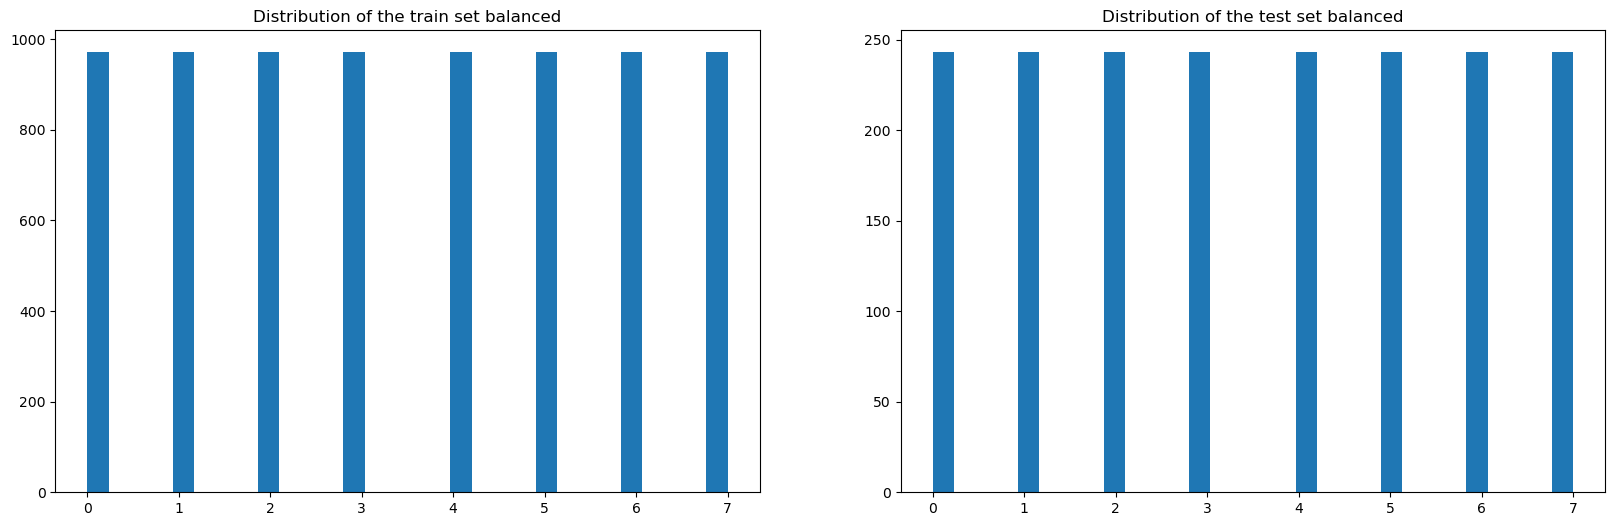

In [108]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.hist(y_train_balanced, bins=30)
plt.title('Distribution of the train set balanced')
# plt.show()

plt.subplot(1, 2, 2)
plt.hist(y_test_balanced, bins=30)
plt.title('Distribution of the test set balanced')

plt.show()


## (Upload and Donwload the model in case you just want to evaluete)

In case we already have the model trained we can upload and skip the Fit/training the model:

In [109]:
# ATENTION !!

import joblib

# Save the model
# joblib.dump(logreg, 'logistic_regression_model.pkl')

# Load the model
# logreg = joblib.load('../models/logistic_regression_model.pkl')
# result = logreg.score(X_test, y_test)
# print(result)

## Fit the model (in this case, train the logistic regression)

Training/fiting the models

In [111]:
# Training logistic regression model
logreg = LogisticRegression(
    max_iter=10000,
    # n_jobs=-1,
    verbose=1
)
logreg.fit(X_train_balanced, y_train_balanced)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        80008     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61531D+04    |proj g|=  4.24265D+02


 This problem is unconstrained.



At iterate   50    f=  6.19580D+03    |proj g|=  1.20338D+02

At iterate  100    f=  5.20352D+03    |proj g|=  6.12137D+01

At iterate  150    f=  4.66392D+03    |proj g|=  4.18031D+01

At iterate  200    f=  4.03775D+03    |proj g|=  2.41138D+01

At iterate  250    f=  3.39694D+03    |proj g|=  9.97899D+01

At iterate  300    f=  2.69540D+03    |proj g|=  2.30821D+01

At iterate  350    f=  2.18561D+03    |proj g|=  1.17255D+01

At iterate  400    f=  1.89254D+03    |proj g|=  1.60101D+01

At iterate  450    f=  1.71806D+03    |proj g|=  1.13629D+01

At iterate  500    f=  1.61719D+03    |proj g|=  6.80934D+00

At iterate  550    f=  1.54188D+03    |proj g|=  1.03277D+01

At iterate  600    f=  1.48891D+03    |proj g|=  1.49226D+01

At iterate  650    f=  1.45676D+03    |proj g|=  4.03997D+00

At iterate  700    f=  1.42272D+03    |proj g|=  4.91841D+00

At iterate  750    f=  1.39644D+03    |proj g|=  2.29896D+00

At iterate  800    f=  1.35758D+03    |proj g|=  8.15339D+00

At iter

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 17.5min finished


LogisticRegression(max_iter=10000, n_jobs=-1, verbose=1)

In [129]:
#To save the model after training

# import joblib

# # Save the model
# joblib.dump(logreg, 'logistic_regression_baseline_model.pkl')

['logistic_regression_baseline_model.pkl']

## Evaluete the model

Seeing how the model peform with the train and test data:

In [127]:
# Training and test score
print(f"Balanced Train score: {logreg.score(X_train_balanced, y_train_balanced)}")
print(f"Balanced Test score: {logreg.score(X_test_balanced, y_test_balanced)}")
# print("-----------------------")
# print(f"Train score: {logreg.score(X_train, y_train)}")
# print(f"Test score: {logreg.score(X_test, y_test)}")

Balanced Train score: 0.9998712667353244
Balanced Test score: 0.5761316872427984


### Accuracy, Precision, Recall, f1

Getting Accuracy, Precision, Recall and f1 from the model and seeing in each class

In [128]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test_balanced)
report_initial = classification_report(y_test_balanced, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.46      0.40      0.43       243
           1       0.64      0.57      0.60       243
           2       0.33      0.33      0.33       243
           3       0.44      0.42      0.43       243
           4       0.54      0.58      0.56       243
           5       0.56      0.65      0.60       243
           6       0.68      0.74      0.71       243
           7       0.96      0.91      0.94       243

    accuracy                           0.58      1944
   macro avg       0.58      0.58      0.57      1944
weighted avg       0.58      0.58      0.57      1944



### Confusion Matrix 

Plotting the confusion Matrix (as a porcentage) and observate the classification from the model

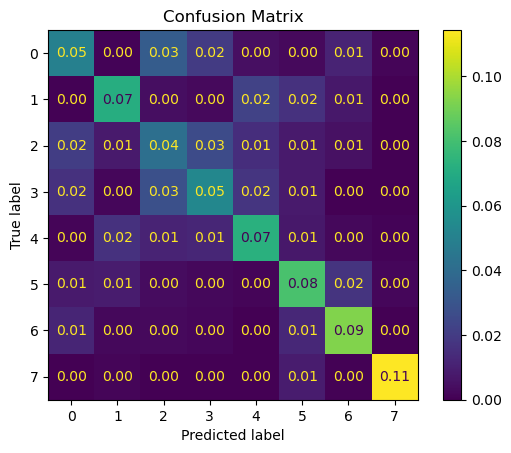

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_pred, normalize='all', values_format='.2f')
plt.title('Confusion Matrix')
plt.show()


### One-vs-Rest (OvR) multiclass ROC

Evaluating the ROC-AUC from the models.

Using the LabelBinarizer to normalize the data, calculationg the micro and macro average and plotting all classes to see theirs respective curves/values.


More information at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [118]:
from sklearn.preprocessing import LabelBinarizer

# use a LabelBinarizer to binarize the target by one-hot-encoding in a OvR fashion.
# This means that the target of shape (n_samples,) is mapped to a target of shape (n_samples, n_classes).

label_binarizer = LabelBinarizer().fit(y_train_balanced)
y_onehot_test = label_binarizer.transform(y_test_balanced)
y_onehot_test.shape  # (n_samples, n_classes)

# #check the encoding of a specific class: #SanityCheck
# label_binarizer.transform([1])

(1944, 8)

In [119]:
cells = {
    0 : 'basophil',
    1 : 'eosinophil',
    2 : 'erythroblast',
    3 : 'ig',
    4 : 'lymphocyte',
    5 : 'monocyte',
    6 : 'neutrophil',
    7 : 'platelet',
}

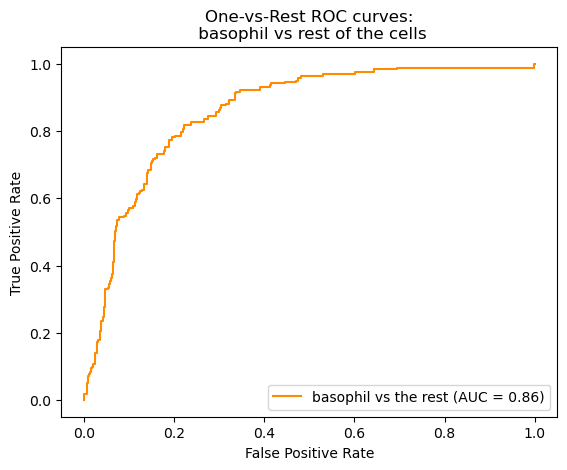

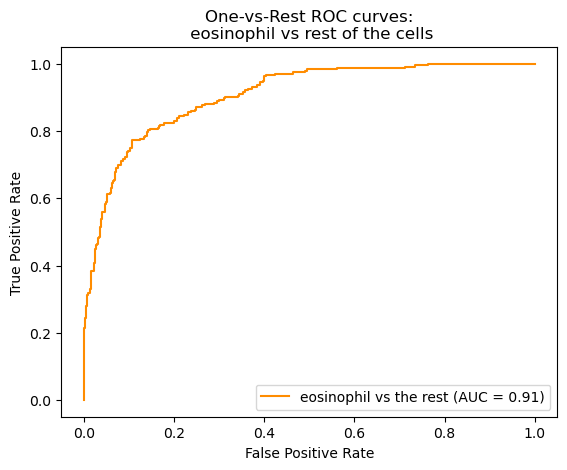

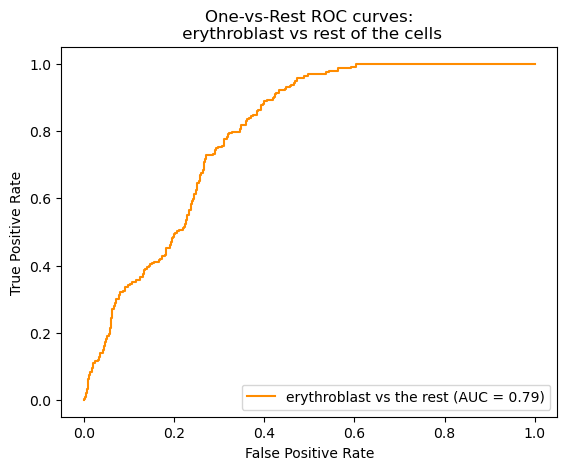

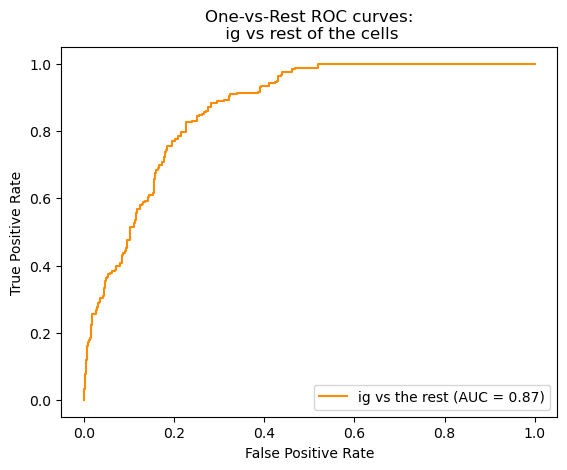

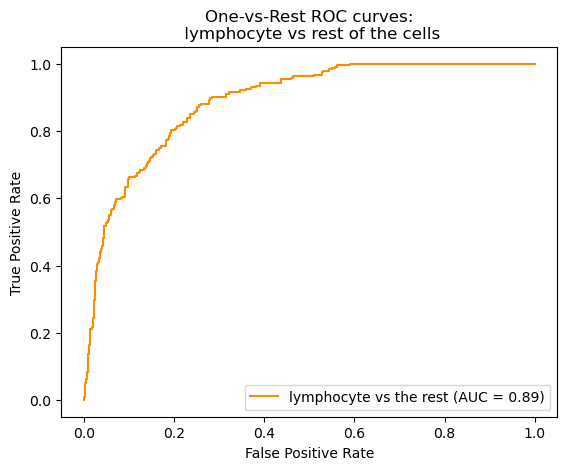

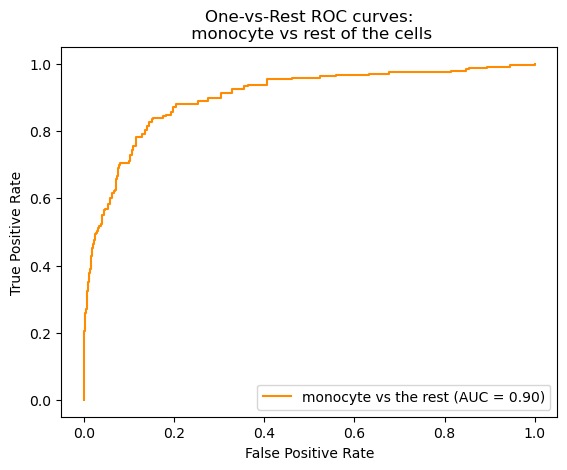

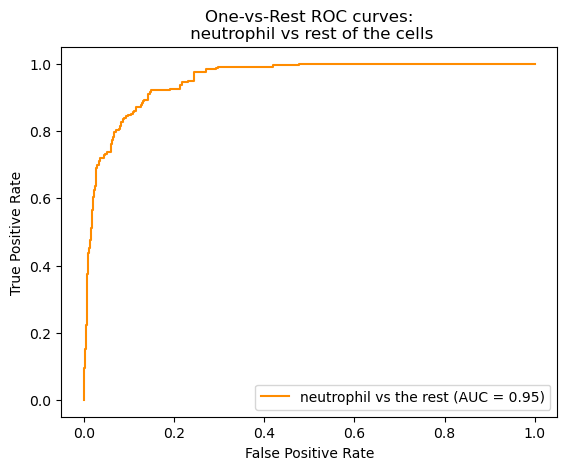

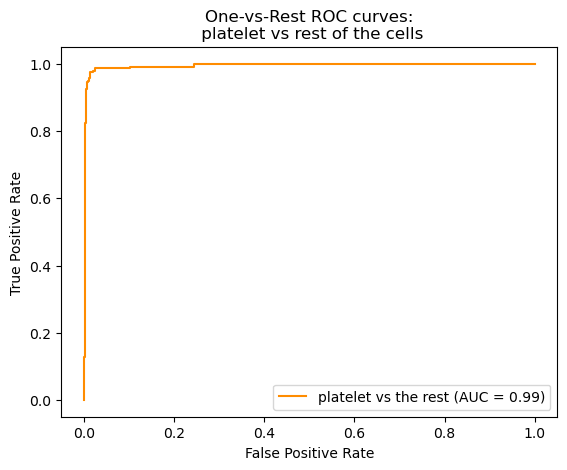

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

y_score = logreg.predict_proba(X_test_balanced)
# y_score= (logreg.predict_proba(X_test)[:, class_id] >= 0.9).astype(int) 
# print(y_pred_new_threshold)

for i in range(0,8):
    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],
        y_score[:, i],
        name=f"{cells[i]} vs the rest",
        color="darkorange",
    )
    _ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title='One-vs-Rest ROC curves:\n {} vs rest of the cells'.format(cells[i]),
)


In [121]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

# ---------------------
# Can also evaluate with the build-in method, but for the next plot we need to have the variables

# micro_roc_auc_ovr = roc_auc_score(
#     y_test,
#     y_score,
#     multi_class="ovr",
#     average="micro",
# )

# print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")


Micro-averaged One-vs-Rest ROC AUC score:
0.91


In [122]:
# ROC curve using the OvR macro-average

n_classes = 8
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

# ---------------------
# Can also evaluate with the build-in method, but for the next plot we need to have the variables
# macro_roc_auc_ovr = roc_auc_score(
#     y_test,
#     y_score,
#     multi_class="ovr",
#     average="macro",
# )
# print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")


Macro-averaged One-vs-Rest ROC AUC score:
0.90


NOTE : In a multi-class classification setup with highly imbalanced classes, micro-averaging is preferable over macro-averaging. In such cases, one can alternatively use a weighted macro-averaging, not demoed here.

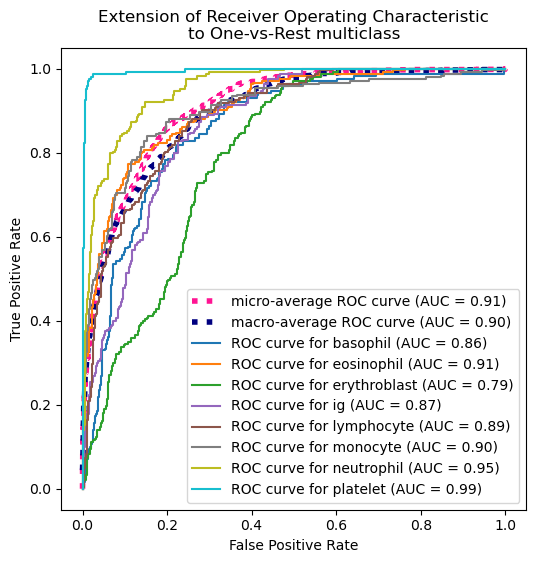

In [123]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

#Plotting micro-avg Roc curve
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

# Plotting Macro-AVG Roc curve
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

# Classes numbers
n_classes = 8

# Generate a color palette
colors = cycle(plt.cm.tab10(np.linspace(0, 1, n_classes)))

for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {cells[class_id]}",
        color=color,
        ax=ax,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

#reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

## Using the model to predict the specifics images

In [126]:
filename = '../datasets/dataset_normal/basophil/BA_47.jpg'         #gets right
# filename = '../datasets/dataset_normal/neutrophil/BNE_715.jpg'   #gets wrong

cells = {
    0 : 'basophil',
    1 : 'eosinophil',
    2 : 'erythroblast',
    3 : 'ig',
    4 : 'lymphocyte',
    5 : 'monocyte',
    6 : 'neutrophil',
    7 : 'platelet',
}

img = cv2.imread(os.path.join(filename))
img = cv2.resize(img, (100, 100))  # Resize image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
X = img.flatten()  # Flatten image
X = X / 255.0  

result = logreg.predict([X])
print(f"The cell that was detect was: {cells[result[0]]}")

The cell that was detect was: basophil
